
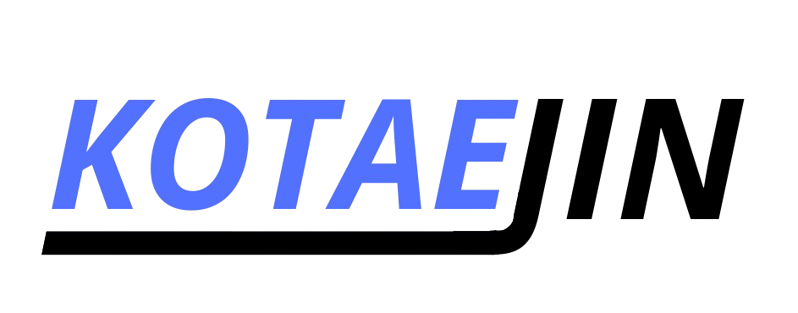

# Sumário

- Descrição do problema
 - Perguntas para serem respondidas utilizando a análise exploratória
- Configurações iniciais
 - Instalando Bibliotecas
 - Realização dos imports
 - Conectando ao google drive
 - Definição de caminhos para a base
- Análise exploratória
 - Definição de funções para a análise exploratória
 - Principais dúvidas do chat
 - Palavras que são mais escritas incorretamente
 - Gírias mais utilizadas pelos clientes
 - Pontuações mais frequentes nas perguntas
 - Bigramas mais frequentes nas respostas ao cliente
- Definição de funções de etapas de pré-processamento
 - Lendo base de dados
 - Treinando tagger floresta
 - Definindo funções para o pré-processamento
 - Testes das funções de pré-processamento
- Uso de Pipeline de pré-processamento
 - Definição da Pipeline
 - Lendo perguntas da base de dados para realização de testes
 - Execução da pipeline
 - Exibição de resultados obtidos
 - Testes de validação de Pipeline
- Bag of Words
 - Definição de função de vetorização Bag of Words (BoW)
 - Testes Bag of Words
- RNN
 - Label Encoder
 - Formatação de Dados Para a Rede Neural
 - Definição do Modelo
 - Compilação do Modelo
 - Early Stop
 - Treinando Modelo
 - Desempenho do Modelo
 - Predição
- Análise Treinamento GPU x CPU
 - Comparação de Resultados

# Descrição do Problema

Conforme descrito no [TAPI](https://drive.google.com/drive/u/1/folders/1N6OswJHbb8QLdlJ9wX9T_IU9zWtTIsNU), dentro do tópico "Esboço do Problema" e do subtópico "Problema", o Serviço de Atendimento ao Cliente (SAC) enfrenta uma demanda elevada, com mais de 25 mil atendimentos mensais realizados via chat online (Live Chat) em múltiplos idiomas. Este volume de solicitações ultrapassa a capacidade de resposta dos atendentes humanos, resultando em atrasos no atendimento e gerando insatisfação entre os clientes.

De acordo com o subtópico "Objetivo" no [TAPI](https://drive.google.com/drive/u/1/folders/1N6OswJHbb8QLdlJ9wX9T_IU9zWtTIsNU), para enfrentar este desafio, será desenvolvido um chatbot utilizando modelos abertos de IA Generativa, com foco no atendimento ao cliente. Este chatbot será gerido por um grupo de usuários internos, que poderão criar, operar e personalizar o sistema de forma contínua. Durante o projeto, um desenvolvedor da Brastel, localizado no Brasil, será designado para colaborar no desenvolvimento, garantindo que os protótipos desenvolvidos possam ser efetivamente utilizados na construção do sistema final.


### Perguntas para Análise Exploratória

1. **Em qual período do dia o chat recebe mais acessos?**
   - **Propósito:** Entender os momentos de pico de uso do chat ao longo do dia é essencial para planejar a escalabilidade do sistema e prevenir possíveis congestionamentos devido ao alto número de acessos simultâneos.

2. **Quais são as dúvidas mais frequentes entre os usuários?**
   - **Propósito:** Identificar as dúvidas mais comuns permite configurar respostas pré-definidas no chatbot, otimizando o tempo de resposta e reduzindo o processamento desnecessário.

3. **Qual é a proporção de palavras recorrentes escritas de maneira incorreta?**
   - **Propósito:** Avaliar a frequência de erros ortográficos comuns ajuda a treinar o modelo para reconhecer e interpretar corretamente essas variações, melhorando a eficiência do chatbot.

4. **As mensagens contêm muitas gírias ou abreviações?**
   - **Propósito:** Analisar o uso de gírias e abreviações nas mensagens é importante, pois o modelo precisa ser treinado para entender esses termos. Identificar as mais comuns auxilia no treinamento para aumentar a precisão do chatbot.

5. **O uso de pontuação é frequente nas mensagens?**
   - **Propósito:** Compreender o padrão de uso de pontuação nas mensagens ajuda a entender o estilo de comunicação dos usuários. A pontuação pode mudar o sentido das frases, transformando uma afirmação em uma pergunta, por exemplo, o que é crítico para a interpretação correta pelo chatbot.

6. **As respostas dos usuários seguem algum padrão específico?**
   - **Propósito:** Identificar padrões nas respostas pode revelar se há uma repetição significativa de perguntas ou respostas, o que pode ser utilizado para otimizar as interações e treinamentos do chatbot.


#Configurações Iniciais

In [1]:
DOWNLOAD_DF = False
DOWNLOAD_DF_NUMERIC = False

## Instalando Bibliotecas

In [2]:
!pip install spacy
!python -m spacy download pt_core_news_sm
!pip install -U scikit-learn
!pip install openpyxl
!pip install pyspellchecker
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 20.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 45.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 38.0 MB/s eta 0:00:00


## Realização dos imports


Nesta etapa, o colab é preparado com a instalação e importação de bibliotecas e pacotes necessários para a execução do projeto.

In [3]:
import nltk
import random
import re
import spacy
import string
import time
import unittest

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

from collections import Counter, defaultdict
from google.colab import files
from IPython.display import display

from nltk.corpus import stopwords, floresta
from nltk.stem import PorterStemmer, SnowballStemmer, RSLPStemmer, WordNetLemmatizer
from nltk.tag import pos_tag, UnigramTagger
from nltk.tokenize import sent_tokenize, word_tokenize

from spellchecker import SpellChecker
from sklearn.datasets import make_classification
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dropout, Dense, Layer, SimpleRNN, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam



nltk.download('averaged_perceptron_tagger')
nltk.download('floresta')
nltk.download('maxent_ne_chunker')
nlp = spacy.load("pt_core_news_sm")
nltk.download('punkt')
nltk.download('rslp')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package floresta to /root/nltk_data...
[nltk_data]   Unzipping corpora/floresta.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

## Conectando ao google drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Definição de caminhos para a base

In [5]:
DEFAULT_XLS_PATH = "/content/drive/MyDrive/m11/data/chat_clients.xlsx"
DEFAULT_CSV_PATH = "/content/drive/MyDrive/m11/data/balanced_dataset.csv"

def get_file_paths():
    xls_path = input(f"Digite o caminho do arquivo Excel (ou pressione Enter para usar o caminho padrão): ")
    xls_path = xls_path if xls_path.strip() else DEFAULT_XLS_PATH

    csv_path = input(f"Digite o caminho do arquivo CSV (ou pressione Enter para usar o caminho padrão): ")
    csv_path = csv_path if csv_path.strip() else DEFAULT_CSV_PATH

    return xls_path, csv_path

XLS_PATH, CSV_PATH = get_file_paths()

Digite o caminho do arquivo Excel (ou pressione Enter para usar o caminho padrão): 
Digite o caminho do arquivo CSV (ou pressione Enter para usar o caminho padrão): 


#Análise exploratória

## Definição de funções para a análise exploratória

In [6]:
def remocao_stopword(text):
    stop_words = set(stopwords.words('portuguese'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

def conversao_minuscula(text):
    try:
        text = text.lower()
    except:
        pass
    return text

def encontrar_erros(texto):
    spell = SpellChecker(language='pt')
    palavras = texto.split()
    palavras_erradas = spell.unknown(palavras)
    return palavras_erradas

def limpar_sentenca(sentence: str) -> str:
    cleaned_sentence = re.sub(r'[^a-zA-Z0-9\s]', '', sentence)
    return cleaned_sentence

def verificar_giras_abreviacoes(texto, giras_abreviacoes):
    palavras = texto.lower().split()
    giras_encontradas = [palavra for palavra in palavras if palavra in giras_abreviacoes]
    return giras_encontradas

def contar_pontuacoes(texto):
    pontuacoes = re.findall(r'[^\w\s]', texto)
    return pontuacoes

def encontrar_bigramas(texto):
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    bag_of_words = vectorizer.fit_transform([texto])
    bigramas = vectorizer.get_feature_names_out()
    frequencias = bag_of_words.toarray().sum(axis=0)
    return dict(zip(bigramas, frequencias))

In [7]:
df_filtrado = pd.read_excel(XLS_PATH)[['Intencao', 'Pergunta', 'Resposta\n']]
df_filtrado.rename(columns={'Resposta\n': 'Resposta'}, inplace=True)

df_filtrado['Pergunta'] = df_filtrado['Pergunta'].apply(limpar_sentenca)
df_filtrado['Pergunta'] = df_filtrado['Pergunta'].apply(remocao_stopword)
df_filtrado['Pergunta'] = df_filtrado['Pergunta'].apply(conversao_minuscula)
df_filtrado['Intencao'] = df_filtrado['Intencao'].apply(conversao_minuscula)
df_filtrado['Resposta'] = df_filtrado['Resposta'].apply(conversao_minuscula)


df_filtrado

,Intencao,Pergunta,Resposta
0,como depositar,boa diatudo bemeu gostaria saber sobre caixa f...,"bom dia! sim, o sr pode utilizar o cartão de d..."
1,como fazer remessa,como enviar dinheiro japo,"para se inscrever no serviço de remessa, por f..."
2,tempo de remessa,quanto tempo levar beneficirio receber dinheiro,"via de regra, as remessas serão pagas via pix ..."
3,"pedido de envio via metodo ""byphone""",boa tarde acabei fazer transferncia 2223 total...,iremos processar a sua solicitacao.\nmuito obr...
4,"pedido de envio via metodo ""byphone""",poderia fazer remessa 22yenes bbb rrr obrigado...,iremos processar a sua solicitacao.\nmuito obr...
...,...,...,...
500,atualizacao de dados cadastrais,boa tarde fao fazer mudana endereo,a senhora pode trocar pelo próprio app da bras...
501,tempo de entrega do cartao,bom dia consegui fazer depsito carto ainda che...,boa noite\no sr solicitou dia 28. será entregu...
502,cancelamento,boa noitea beneficiria avisou conta est errado...,"sim, podemos cancelar\no valor voltará no seu ..."
503,reembolso,boa noite eu fiz depsito errado pra depositar ...,é possível solicitar o reembolso diretamente d...


## Principais dúvidas do chat

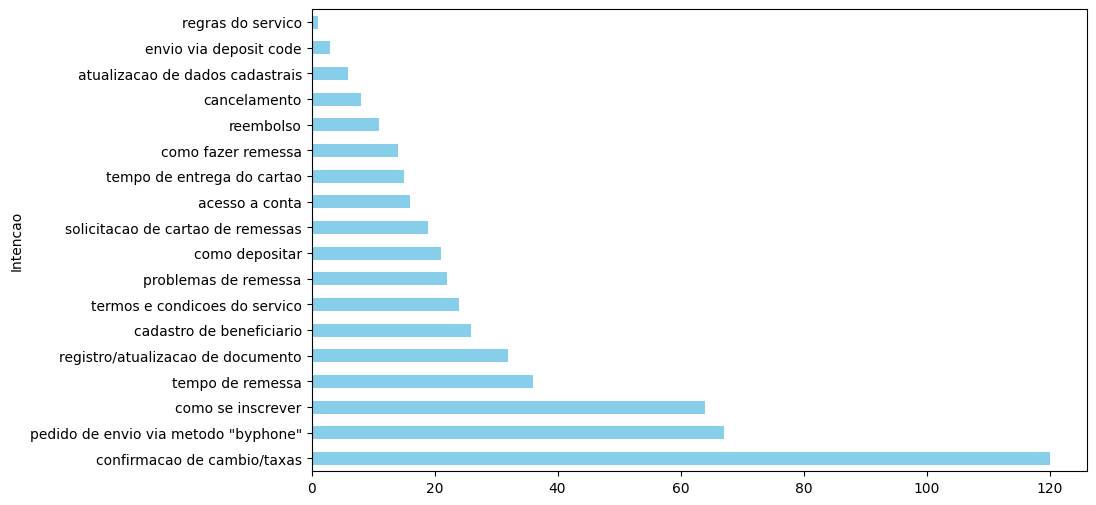

In [8]:
contagem = df_filtrado['Intencao'].value_counts()
plt.figure(figsize=(10, 6))
contagem.plot(kind='barh', color='skyblue')

plt.show()

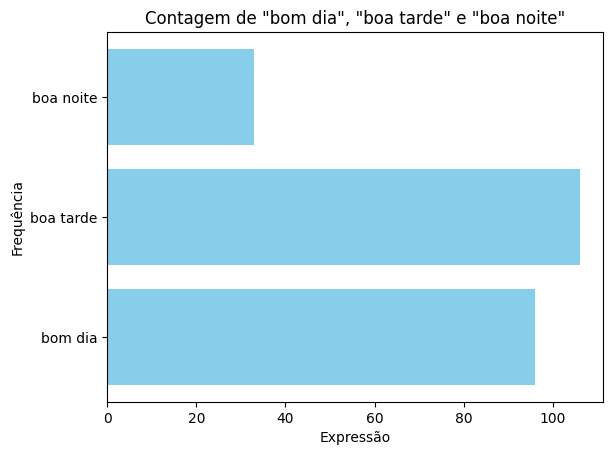

In [9]:
data = {
    'mensagens': [
        'bom dia',
        'boa tarde',
        'boa noite'
    ]
}

df = pd.DataFrame(data)

contagem = {
    'bom dia': df_filtrado['Pergunta'].str.contains('bom dia', case=False).sum(),
    'boa tarde': df_filtrado['Pergunta'].str.contains('boa tarde', case=False).sum(),
    'boa noite': df_filtrado['Pergunta'].str.contains('boa noite', case=False).sum()
}

plt.barh(list(contagem.keys()), list(contagem.values()), color=['skyblue'])
plt.xlabel('Expressão')
plt.ylabel('Frequência')
plt.title('Contagem de "bom dia", "boa tarde" e "boa noite"')
plt.show()

## Palavras que são mais escritas incorretamente

In [10]:
spell = SpellChecker(language='pt')
stop_words = set(stopwords.words('portuguese'))


def preprocessar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    return texto

def encontrar_erros(texto):
    texto = preprocessar_texto(texto)
    palavras = texto.split()
    erros = [palavra for palavra in palavras if palavra not in stop_words and palavra not in spell]
    return erros

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80')])

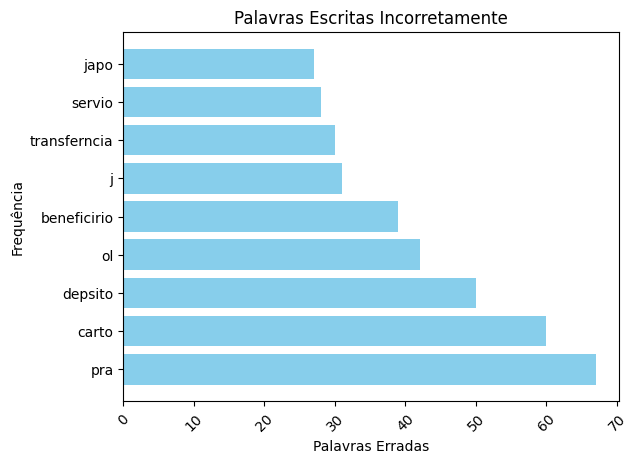

In [11]:
df_filtrado['erros'] = df_filtrado['Pergunta'].apply(lambda x: encontrar_erros(x))
todos_erros = [erro for sublist in df_filtrado['erros'] for erro in sublist]
contagem_erros = Counter(todos_erros)
top_erros = contagem_erros.most_common(10)[1:]
palavras, frequencias = zip(*top_erros)
plt.barh(list(palavras), list(frequencias), color='skyblue')
plt.xlabel('Palavras Erradas')
plt.ylabel('Frequência')
plt.title('Palavras Escritas Incorretamente')
plt.xticks(rotation=45)

## Gírias mais utilizadas pelos clientes

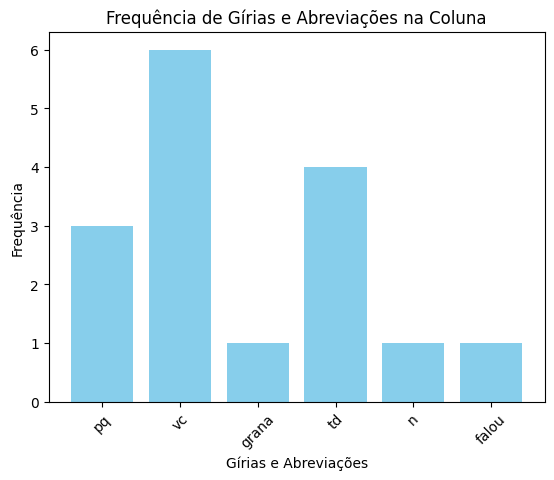

In [12]:
giras_abreviacoes = [
    "rolê", "zoar", "dahora", "massa", "mano", "man", "bicho", "treta", "falou",
    "sussa", "balada", "perifa", "bagulho", "cabuloso", "grana", "leco",
    "vc", "tb", "blz", "qnd", "pq", "ctz", "fds", "tbm", "mt", "flw", "n",
    "td", "tlg", "tá", "lol", "brb", "omg", "btw", "asap"
]

df_filtrado['giras_encontradas'] = df_filtrado['Pergunta'].apply(lambda x: verificar_giras_abreviacoes(x, giras_abreviacoes))

todos_giras = [giria for sublist in df_filtrado['giras_encontradas'] for giria in sublist]
contagem_giras = Counter(todos_giras)

plt.bar(contagem_giras.keys(), contagem_giras.values(), color='skyblue')
plt.xlabel('Gírias e Abreviações')
plt.ylabel('Frequência')
plt.title('Frequência de Gírias e Abreviações na Coluna')
plt.xticks(rotation=45)
plt.show()

## Pontuações mais frequentes nas perguntas

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


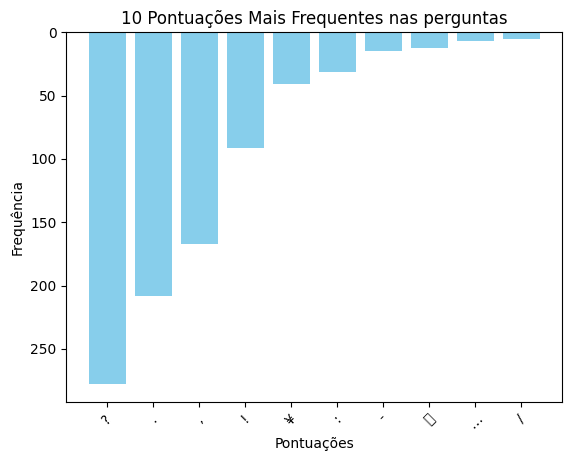

In [13]:
df = pd.read_excel(XLS_PATH)[['Intencao', 'Pergunta', 'Resposta\n']]

df['pontuacoes'] = df['Pergunta'].apply(contar_pontuacoes)

todas_pontuacoes = [ponto for sublist in df['pontuacoes'] for ponto in sublist]
contagem_pontuacoes = Counter(todas_pontuacoes)

top_10_pontuacoes = contagem_pontuacoes.most_common(10)

pontuacoes, frequencias = zip(*top_10_pontuacoes)

plt.bar(pontuacoes, frequencias, color='skyblue')
plt.xlabel('Pontuações')
plt.ylabel('Frequência')
plt.title('10 Pontuações Mais Frequentes nas perguntas')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()

plt.show()

## Bigramas mais frequentes nas respostas ao cliente

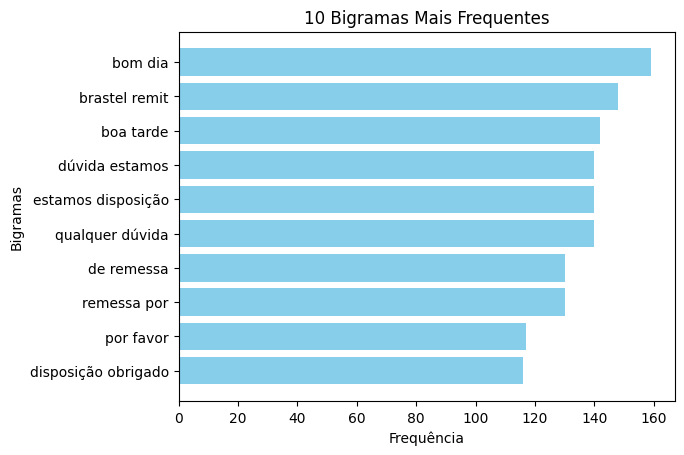

In [14]:
df['Resposta\n'] = df['Resposta\n'].fillna('')

todos_bigramas = Counter()
for texto in df['Resposta\n']:
    try:
        bigramas = encontrar_bigramas(texto)
        todos_bigramas.update(bigramas)
    except:
        pass

top_10_bigramas = todos_bigramas.most_common(10)

bigramas, frequencias = zip(*top_10_bigramas)

plt.barh(bigramas, frequencias, color='skyblue')
plt.xlabel('Frequência')
plt.ylabel('Bigramas')
plt.title('10 Bigramas Mais Frequentes')
plt.gca().invert_yaxis()
plt.show()

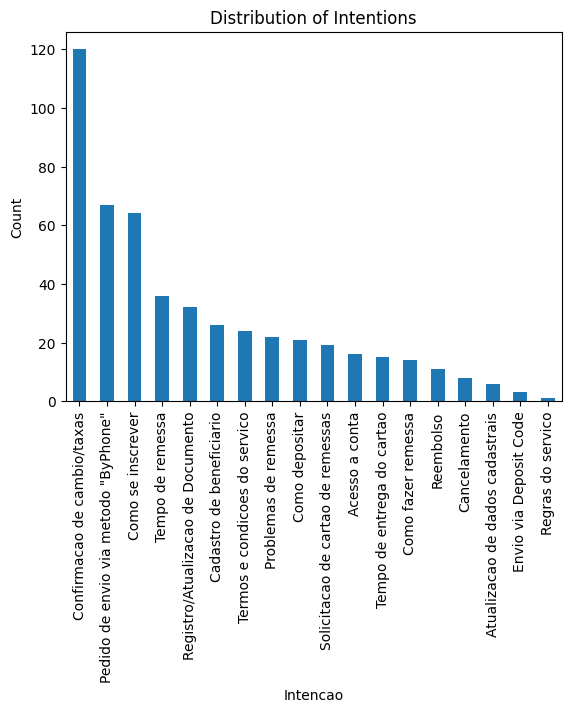

In [15]:
import matplotlib.pyplot as plt

df['Intencao'].value_counts().plot(kind='bar')
plt.xlabel('Intencao')
plt.ylabel('Count')
_ = plt.title('Distribution of Intentions')

#Definição de funções de etapas de pré-processamento

## lendo base de dados

In [16]:
file_path = CSV_PATH
headers = ["numero", "intencao", "pergunta", "resposta"]
csv_words = pd.read_csv(file_path)
csv_words.shape

(5784, 3)

In [17]:
csv_words.dropna(axis=1, how="all", inplace=True)
csv_words.dropna(axis=0, how="all", inplace=True)

csv_words.shape

(5784, 3)

In [18]:
csv_words = csv_words.apply(lambda x: x.str.replace("\n", " ", regex=False) if x.dtype == "object" else x)
csv_words = csv_words.apply(lambda x: x.str.replace("\t", " ", regex=False) if x.dtype == "object" else x)
csv_words = csv_words.apply(lambda x: x.str.replace("\r", " ", regex=False) if x.dtype == "object" else x)
csv_words = csv_words.apply(lambda x: x.str.replace("\f", " ", regex=False) if x.dtype == "object" else x)
csv_words = csv_words.apply(lambda x: x.str.replace("\v", " ", regex=False) if x.dtype == "object" else x)

In [19]:
print(df.shape)
csv_words.head()

(505, 4)


,Intencao,Pergunta,Resposta\n
0,Acesso a conta,Eu não consigo entrar na conta,Boa tarde. Chegou o e-mail com a senha temporá...
1,Acesso a conta,Oi bom dia Quero entrar na minha conta da Bras...,"Bom dia, O senhor não lembra da senha de login?"
2,Acesso a conta,Atualizei os site e agora como acessar minha c...,Bom dia Você tem acesso a este email (aaaa@bbb...
3,Acesso a conta,favor fazer o depósito no saldo que fareio env...,"Bom dia, O senhor pode nos confirmar seu email..."
4,Acesso a conta,Boa tarde. Sou QQQ JJJ Mudei de aparelho de c...,"Bom dia Para recuperar o acesso a sua conta, ..."


## Definindo funções para o pré-processamento

In [20]:
import spacy
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
import string

# Carregue o modelo do spaCy para português
nlp = spacy.load('pt_core_news_sm')

def segmentar(texto):
    """Segmenta o texto em sentenças."""
    return sent_tokenize(texto, language='portuguese')

def tokenizar(texto):
    """Tokeniza o texto em palavras."""
    return word_tokenize(texto, language='portuguese')

def lematizar(tokens):
    """Lemmatiza tokens usando spaCy."""
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

def stemming(tokens):
    """Aplica stemming aos tokens usando RSLPStemmer."""
    stemmer = RSLPStemmer()
    return [stemmer.stem(token) for token in tokens]

def remover_stopwords(tokens):
    """Remove stopwords dos tokens."""
    stop_words = set(stopwords.words("portuguese"))
    return [word for word in tokens if word.lower() not in stop_words]

def pos_tagging(tokens):
    """Realiza POS tagging nos tokens usando spaCy."""
    doc = nlp(" ".join(tokens))
    return [(token.text, token.pos_) for token in doc]

def remover_pontuacao(tokens):
    """Remove pontuação dos tokens."""
    return [token for token in tokens if token not in string.punctuation]

def reconhecimento_entidades_nomeadas(tokens):
    """Reconhece entidades nomeadas nos tokens usando spaCy."""
    doc = nlp(" ".join(tokens))
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


## Testes das funções de pré-processamento

In [21]:
# Texto de exemplo
texto = "O Leandro comprou um carro novo. Ele está muito feliz com a nova aquisição!"

In [22]:
# Teste da função segmentar
resultado_esperado_segmentar = ['O Leandro comprou um carro novo.', 'Ele está muito feliz com a nova aquisição!']
resultado_obtido_segmentar = segmentar(texto)
assert resultado_obtido_segmentar == resultado_esperado_segmentar, f"Erro no teste de segmentação. Esperado: {resultado_esperado_segmentar}, Obtido: {resultado_obtido_segmentar}"
print("Teste de segmentação passou!")

Teste de segmentação passou!


In [23]:
# Teste da função tokenizar
resultado_esperado_tokenizar = ['O', 'Leandro', 'comprou', 'um', 'carro', 'novo', '.', 'Ele', 'está', 'muito', 'feliz', 'com', 'a', 'nova', 'aquisição', '!']
resultado_obtido_tokenizar = tokenizar(texto)
assert resultado_obtido_tokenizar == resultado_esperado_tokenizar, f"Erro no teste de tokenização. Esperado: {resultado_esperado_tokenizar}, Obtido: {resultado_obtido_tokenizar}"
print("Teste de tokenização passou!")

Teste de tokenização passou!


In [24]:
# Teste da função lematizar
tokens_exemplo = ['Leandro', 'comprou', 'carros']
resultado_esperado_lematizar = ['Leandro', 'comprar', 'carro']
resultado_obtido_lematizar = lematizar(tokens_exemplo)
assert resultado_obtido_lematizar == resultado_esperado_lematizar, f"Erro no teste de lematização. Esperado: {resultado_esperado_lematizar}, Obtido: {resultado_obtido_lematizar}"
print("Teste de lematização passou!")

Teste de lematização passou!


In [25]:
# Teste da função stemming
resultado_esperado_stemming = ['leandr', 'compr', 'carr']
resultado_obtido_stemming = stemming(tokens_exemplo)
assert resultado_obtido_stemming == resultado_esperado_stemming, f"Erro no teste de stemming. Esperado: {resultado_esperado_stemming}, Obtido: {resultado_obtido_stemming}"
print("Teste de stemming passou!")

Teste de stemming passou!


In [26]:
# Teste da função remover_stopwords
resultado_esperado_remover_stopwords = ['Leandro', 'comprou', 'carros']
resultado_obtido_remover_stopwords = remover_stopwords(tokens_exemplo)
assert resultado_obtido_remover_stopwords == resultado_esperado_remover_stopwords, f"Erro no teste de remoção de stopwords. Esperado: {resultado_esperado_remover_stopwords}, Obtido: {resultado_obtido_remover_stopwords}"
print("Teste de remoção de stopwords passou!")

Teste de remoção de stopwords passou!


In [27]:
# Teste da função pos_tagging
resultado_esperado_pos_tagging = [('Leandro', 'PROPN'), ('comprou', 'VERB'), ('carros', 'NOUN')]
resultado_obtido_pos_tagging = pos_tagging(tokens_exemplo)
assert resultado_obtido_pos_tagging == resultado_esperado_pos_tagging, f"Erro no teste de POS tagging. Esperado: {resultado_esperado_pos_tagging}, Obtido: {resultado_obtido_pos_tagging}"
print("Teste de POS tagging passou!")

Teste de POS tagging passou!


In [28]:
# Teste da função remover_pontuacao
tokens_com_pontuacao = ['Leandro', ',', 'comprou', 'carros', '.']
resultado_esperado_remover_pontuacao = ['Leandro', 'comprou', 'carros']
resultado_obtido_remover_pontuacao = remover_pontuacao(tokens_com_pontuacao)
assert resultado_obtido_remover_pontuacao == resultado_esperado_remover_pontuacao, f"Erro no teste de remoção de pontuação. Esperado: {resultado_esperado_remover_pontuacao}, Obtido: {resultado_obtido_remover_pontuacao}"
print("Teste de remoção de pontuação passou!")

Teste de remoção de pontuação passou!


In [29]:
# Teste da função reconhecimento_entidades_nomeadas
resultado_esperado_reconhecimento_entidades = [('Leandro', 'PER')]
resultado_obtido_reconhecimento_entidades = reconhecimento_entidades_nomeadas(tokens_exemplo)
assert resultado_obtido_reconhecimento_entidades == resultado_esperado_reconhecimento_entidades, f"Erro no teste de reconhecimento de entidades nomeadas. Esperado: {resultado_esperado_reconhecimento_entidades}, Obtido: {resultado_obtido_reconhecimento_entidades}"
print("Teste de reconhecimento de entidades nomeadas passou!")

Teste de reconhecimento de entidades nomeadas passou!


#Uso de Pipeline de pré-processamento

## Definição da Pipeline

In [30]:
def pipeline_preprocessamento(texto, intencao, aplicar_segmentacao=True, aplicar_tokenizacao=True, aplicar_lematizacao=True,
                              aplicar_stemming=True, aplicar_remocao_stopwords=True, aplicar_pos_tagging=True,
                              aplicar_reconhecimento_entidades=True, aplicar_remocao_pontuacao=True):
    if aplicar_segmentacao:
        sentencas = segmentar(texto)
    else:
        sentencas = [texto]

    used_random_numbers = set()

    resultados = []

    sentencaIndex = 0
    for sentenca in sentencas:

        output = {'Sentenca Original': sentenca}

        if aplicar_tokenizacao:
            tokens = tokenizar(sentenca)

        if aplicar_lematizacao:
            tokens = lematizar(tokens)

        if aplicar_reconhecimento_entidades:
            entidades = reconhecimento_entidades_nomeadas(tokens)
            named_entity_tokens = {entity[0] for entity in entidades}
        else:
            named_entity_tokens = set()

        if aplicar_remocao_pontuacao:
            tokens = remover_pontuacao(tokens)

        if aplicar_remocao_stopwords:
            tokens = remover_stopwords(tokens)

        if aplicar_pos_tagging:
            pos_tags = pos_tagging(tokens)
            pos_tag_dict = {word: tag for word, tag in pos_tags}
        else:
            pos_tag_dict = {}

        if aplicar_stemming:
            stemmed_tokens = stemming(tokens)

        sentence_counter = Counter(tokens)

        seen_tokens = set()
        combined_info = []
        for stem, token in zip(stemmed_tokens, tokens):
            if token not in seen_tokens:
                seen_tokens.add(token)
                is_named = True if token in named_entity_tokens else False
                pos = pos_tag_dict.get(token, "None")
                sentence_count = sentence_counter[token]


                combined_info.append([stem, is_named, pos, sentence_count, sentencaIndex, intencao[sentencaIndex]])

        sentencaIndex = sentencaIndex + 1
        output['words'] = combined_info
        resultados.append(output)

    return resultados

## Lendo perguntas da base de dados para realização de testes

In [31]:
csv_words.columns


Index(['Intencao', 'Pergunta', 'Resposta\n'], dtype='object')

In [32]:
csv_words['Pergunta'].head()

,Pergunta
0,Eu não consigo entrar na conta
1,Oi bom dia Quero entrar na minha conta da Bras...
2,Atualizei os site e agora como acessar minha c...
3,favor fazer o depósito no saldo que fareio env...
4,Boa tarde. Sou QQQ JJJ Mudei de aparelho de c...


In [33]:
perguntas_concatenadas = ' '.join(csv_words['Pergunta'].dropna().astype(str))

perguntas_concatenadas

'Eu não consigo entrar na conta Oi bom dia Quero entrar na minha conta da Brastel mas tô sem o cartão Não Atualizei os site e agora como acessar minha conta favor fazer o depósito no saldo que fareio envio via aplicativo. muito obrigado  por favor esqueci a minha senha ou o meu gmail está errado? Boa tarde. Sou QQQ JJJ  Mudei de aparelho de celular e nao consigo baixar o aplicativo da Brastel. Fala senha ou nome invalido. Ja mudei a senha e aparece a mesma coisa Boa tarde Eu gostaria usar o aplicativo da brastel mas nao lembro usuario nem a senha .não tenho como acessar Boa tarde Eu gostaria usar o aplicativo da brastel mas nao lembro usuario nem a senha .não tenho como acessar O meu e mail Yahoo está inativo estou usando outro e-mail ZZZZZ@gmail.com  Eu não consigo entrar na conta Atualizei os site e agora como acessar minha conta Bom dia perdi meu pin e agora não consigo acessar minha conta desde já agradeço Eu não consigo entrar na conta Não consigo enviar dinheiro pra minha irmã no

## Execução da pipeline

In [34]:
csv_words

,Intencao,Pergunta,Resposta\n
0,Acesso a conta,Eu não consigo entrar na conta,Boa tarde. Chegou o e-mail com a senha temporá...
1,Acesso a conta,Oi bom dia Quero entrar na minha conta da Bras...,"Bom dia, O senhor não lembra da senha de login?"
2,Acesso a conta,Atualizei os site e agora como acessar minha c...,Bom dia Você tem acesso a este email (aaaa@bbb...
3,Acesso a conta,favor fazer o depósito no saldo que fareio env...,"Bom dia, O senhor pode nos confirmar seu email..."
4,Acesso a conta,Boa tarde. Sou QQQ JJJ Mudei de aparelho de c...,"Bom dia Para recuperar o acesso a sua conta, ..."
...,...,...,...
5779,Termos e condicoes do servico,Tudo bem. Mas o limite por dia não é y 1000,As perguntas: ①Há quanto tempo você está no Ja...
5780,Termos e condicoes do servico,Bom dia ! Gostaria saber se vcs enviam dinheir...,"boa noite! Sim, enviamos para bancos digitais."
5781,Termos e condicoes do servico,Bom dia ! Gostaria saber se vcs enviam dinheir...,"boa noite! Sim, enviamos para bancos digitais."
5782,Termos e condicoes do servico,Considerando que recebi essa última transferên...,"Boa tarde, O limite por remessa: 800.00 ienes..."


In [35]:
frase_teste = perguntas_concatenadas

resultados = pipeline_preprocessamento(frase_teste, csv_words["Intencao"])

df_resultados = pd.DataFrame(resultados)

df_resultados

,Sentenca Original,words
0,Eu não consigo entrar na conta Oi bom dia Quer...,"[[consig, False, VERB, 1, 0, Acesso a conta], ..."
1,muito obrigado por favor esqueci a minha senh...,"[[obrig, False, VERB, 1, 1, Acesso a conta], [..."
2,Boa tarde.,"[[boa, False, ADJ, 1, 2, Acesso a conta], [tar..."
3,Sou QQQ JJJ Mudei de aparelho de celular e na...,"[[qqq, False, PROPN, 1, 3, Acesso a conta], [j..."
4,Fala senha ou nome invalido.,"[[fal, False, VERB, 1, 4, Acesso a conta], [se..."
...,...,...
4528,Gostaria saber se vcs enviam dinheiro direto p...,"[[gost, False, PROPN, 1, 4528, Regras do servi..."
4529,Bom dia !,"[[bom, False, ADJ, 1, 4529, Regras do servico]..."
4530,Gostaria saber se vcs enviam dinheiro direto p...,"[[gost, False, PROPN, 1, 4530, Regras do servi..."
4531,Considerando que recebi essa última transferên...,"[[consider, False, VERB, 1, 4531, Regras do se..."


## Exibição de resultados obtidos

In [36]:
resultados

[{'Sentenca Original': 'Eu não consigo entrar na conta Oi bom dia Quero entrar na minha conta da Brastel mas tô sem o cartão Não Atualizei os site e agora como acessar minha conta favor fazer o depósito no saldo que fareio envio via aplicativo.',
  'words': [['consig', False, 'VERB', 1, 0, 'Acesso a conta'],
   ['entr', False, 'VERB', 2, 0, 'Acesso a conta'],
   ['em ', False, 'None', 3, 0, 'Acesso a conta'],
   ['cont', False, 'NOUN', 3, 0, 'Acesso a conta'],
   ['oi', False, 'ADP', 1, 0, 'Acesso a conta'],
   ['bom', False, 'ADJ', 1, 0, 'Acesso a conta'],
   ['dia', False, 'NOUN', 1, 0, 'Acesso a conta'],
   ['quer', False, 'VERB', 1, 0, 'Acesso a conta'],
   ['de ', False, 'None', 1, 0, 'Acesso a conta'],
   ['brastel', True, 'PROPN', 1, 0, 'Acesso a conta'],
   ['tô', False, 'PROPN', 1, 0, 'Acesso a conta'],
   ['cart', False, 'NOUN', 1, 0, 'Acesso a conta'],
   ['atualiz', False, 'PROPN', 1, 0, 'Acesso a conta'],
   ['sit', False, 'NOUN', 1, 0, 'Acesso a conta'],
   ['agor', False

In [37]:
for resultado in resultados[:5]:
    print(f"Sentence: {resultado['Sentenca Original']}")
    print("Words:")
    for word_info in resultado['words']:
        print(word_info)
    print("____________________________________________________________________________________________________")

Sentence: Eu não consigo entrar na conta Oi bom dia Quero entrar na minha conta da Brastel mas tô sem o cartão Não Atualizei os site e agora como acessar minha conta favor fazer o depósito no saldo que fareio envio via aplicativo.
Words:
['consig', False, 'VERB', 1, 0, 'Acesso a conta']
['entr', False, 'VERB', 2, 0, 'Acesso a conta']
['em ', False, 'None', 3, 0, 'Acesso a conta']
['cont', False, 'NOUN', 3, 0, 'Acesso a conta']
['oi', False, 'ADP', 1, 0, 'Acesso a conta']
['bom', False, 'ADJ', 1, 0, 'Acesso a conta']
['dia', False, 'NOUN', 1, 0, 'Acesso a conta']
['quer', False, 'VERB', 1, 0, 'Acesso a conta']
['de ', False, 'None', 1, 0, 'Acesso a conta']
['brastel', True, 'PROPN', 1, 0, 'Acesso a conta']
['tô', False, 'PROPN', 1, 0, 'Acesso a conta']
['cart', False, 'NOUN', 1, 0, 'Acesso a conta']
['atualiz', False, 'PROPN', 1, 0, 'Acesso a conta']
['sit', False, 'NOUN', 1, 0, 'Acesso a conta']
['agor', False, 'ADV', 1, 0, 'Acesso a conta']
['acess', False, 'VERB', 1, 0, 'Acesso a con

In [38]:
data = []
for resultado in resultados:
    sentence = resultado['Sentenca Original']
    for word_info in resultado['words']:
        data.append({
            'Sentenca Original': sentence,
            'stemmed': word_info[0],
            'ent_nomeada': word_info[1],
            'pos_tagging': word_info[2],
            'ocorrencias': word_info[3],
            'id_sentenca': word_info[4],
            'intencao': word_info[5]
        })

df = pd.DataFrame(data)

display(df)

,Sentenca Original,stemmed,ent_nomeada,pos_tagging,ocorrencias,id_sentenca,intencao
0,Eu não consigo entrar na conta Oi bom dia Quer...,consig,False,VERB,1,0,Acesso a conta
1,Eu não consigo entrar na conta Oi bom dia Quer...,entr,False,VERB,2,0,Acesso a conta
2,Eu não consigo entrar na conta Oi bom dia Quer...,em,False,None,3,0,Acesso a conta
3,Eu não consigo entrar na conta Oi bom dia Quer...,cont,False,NOUN,3,0,Acesso a conta
4,Eu não consigo entrar na conta Oi bom dia Quer...,oi,False,ADP,1,0,Acesso a conta
...,...,...,...,...,...,...,...
50897,E se é possível fazer remessas do Japão para o...,de,False,None,1,4532,Regras do servico
50898,E se é possível fazer remessas do Japão para o...,jap,True,PROPN,1,4532,Regras do servico
50899,E se é possível fazer remessas do Japão para o...,nubank,False,VERB,1,4532,Regras do servico
50900,E se é possível fazer remessas do Japão para o...,em,False,None,1,4532,Regras do servico


In [39]:
df.describe()

,ocorrencias,id_sentenca
count,50902.000000,50902.000000
mean,1.214432,2172.201387
std,3.239000,1261.912478
min,1.000000,0.000000
25%,1.000000,1080.250000
50%,1.000000,2185.000000
75%,1.000000,3130.000000
max,242.000000,4532.000000


In [40]:
df.columns

Index(['Sentenca Original', 'stemmed', 'ent_nomeada', 'pos_tagging',
       'ocorrencias', 'id_sentenca', 'intencao'],
      dtype='object')

In [41]:
df['intencao'].unique()

array(['Acesso a conta', 'Atualizacao de dados cadastrais',
       'Cadastro de beneficiario', 'Cancelamento', 'Como depositar ',
       'Como fazer remessa', 'Como se inscrever',
       'Confirmacao de cambio/taxas', 'Confirmacao de saldo',
       'Dificuldades com utilizacao do App', 'Envio via Deposit Code',
       'Pedido de envio via metodo "ByPhone"', 'Problemas de remessa',
       'Problemas/Duvidas de atualizacao de dados cadastrais',
       'Problemas/Duvidas sobre deposito',
       'Problemas/Duvidas sobre remessas', 'Reembolso',
       'Registro/Atualizacao de Documento', 'Regras do servico'],
      dtype=object)

In [42]:
df_copy = df.copy()

In [43]:
if DOWNLOAD_DF:
  df.to_csv('my_data.csv', index=False)

  files.download('my_data.csv')

## Testes de validação de Pipeline

In [44]:
def validate_word_info(word_info):
    """
    Este teste tem como objetivo realizar a validação dos arrays de resposta obtidos na pipe

    resultados esperados [String, Boolean, String, Int, Int]
    """
    if len(word_info) != 6:
        print(f"Tamanho de resposta errado: {word_info}")
        return False

    if not isinstance(word_info[0], str):
        print(f"Elemento de índice '0' deve ser do tipo 'String': {word_info}")
        return False

    if not isinstance(word_info[1], bool):
        print(f"Elemento de índice '1' deve ser do tipo 'Boolean': {word_info}")
        return False

    if not (word_info[2] is None or isinstance(word_info[2], str)):
        print(f"Elemento de índice '2' deve ser do tipo 'String: {word_info}")
        return False

    if not isinstance(word_info[3], int):
        print(f"Elemento de índice '3' deve ser do tipo 'Integer': {word_info}")
        return False

    if not isinstance(word_info[4], int):
        print(f"Elemento de índice '4' deve ser do tipo 'Integer': {word_info}")
        return False

    if not isinstance(word_info[5], str):
        print(f"Elemento de índice '5' deve ser do tipo 'String': {word_info}")
        return False

    return True

def validate_results(resultados):
    all_valid = True
    for resultado in resultados:
        for word_info in resultado['words']:
            if not validate_word_info(word_info):
                all_valid = False
    return all_valid

is_valid = validate_results(resultados)
print(f"Os arrays são válidos? {is_valid}")


Os arrays são válidos? True


In [45]:
def testar_pipeline():
    """
    Este teste tem como objetivo a comparação entre resultados obtidos e esperados na execução da pipeline.
    """

    INPUT = "O Leandro comprou um carro novo. Ele está muito feliz com a nova aquisição!"
    INTENCAO = "compra"

    # Somente os campos estáveis são incluídos no resultado esperado
    result_esperado = [
        [
            ['leandr', False, 'N<+prop', 1],
            ['compr', False, 'P+v-fin', 1],
            ['carr', False, 'H+n', 1],
            ['nov', False, '>N+adj', 1]
        ],
        [
            ['feliz', False, 'SC+adj', 1],
            ['nov', False, '>N+adj', 1],
            ['aquis', False, 'H+n', 1]
        ]
    ]

    result_obtido = pipeline_preprocessamento(INPUT, INTENCAO)

    sucesso = True

    print("🤖 Iniciando testes de pipeline... 🤖")
    print("____________________________________________________________________________________________________")

    for s_idx in range(len(result_esperado)):
        for i in range(len(result_esperado[s_idx])):
            # Ajuste aqui para comparar apenas os primeiros quatro elementos, ignorando os dinâmicos
            obtido = result_obtido[s_idx]['words'][i][:4]
            esperado = result_esperado[s_idx][i]
            print(f"Comparando: obtido='{obtido}', esperado='{esperado}'")
            try:
                assert obtido == esperado
                print("✅")
            except AssertionError:
                print("❌")
                sucesso = False
            print("____________________________________________________________________________________________________")

    if sucesso:
        print("👍 Todos os testes passaram!")
    else:
        print("👎 Teste falhou!")

testar_pipeline()


🤖 Iniciando testes de pipeline... 🤖
____________________________________________________________________________________________________
Comparando: obtido='['leandr', True, 'PROPN', 1]', esperado='['leandr', False, 'N<+prop', 1]'
❌
____________________________________________________________________________________________________
Comparando: obtido='['compr', False, 'VERB', 1]', esperado='['compr', False, 'P+v-fin', 1]'
❌
____________________________________________________________________________________________________
Comparando: obtido='['carr', False, 'NOUN', 1]', esperado='['carr', False, 'H+n', 1]'
❌
____________________________________________________________________________________________________
Comparando: obtido='['nov', False, 'ADJ', 1]', esperado='['nov', False, '>N+adj', 1]'
❌
____________________________________________________________________________________________________
Comparando: obtido='['feliz', False, 'ADJ', 1]', esperado='['feliz', False, 'SC+adj', 1]'
❌
_

In [46]:
# Inicialização variável de contagem do tempo para CPU ou GPU
start_time = time.time()

# Bag of Words

## Definição de função de vetorização Bag of Words (BoW)

In [47]:
df.head()

,Sentenca Original,stemmed,ent_nomeada,pos_tagging,ocorrencias,id_sentenca,intencao
0,Eu não consigo entrar na conta Oi bom dia Quer...,consig,False,VERB,1,0,Acesso a conta
1,Eu não consigo entrar na conta Oi bom dia Quer...,entr,False,VERB,2,0,Acesso a conta
2,Eu não consigo entrar na conta Oi bom dia Quer...,em,False,None,3,0,Acesso a conta
3,Eu não consigo entrar na conta Oi bom dia Quer...,cont,False,NOUN,3,0,Acesso a conta
4,Eu não consigo entrar na conta Oi bom dia Quer...,oi,False,ADP,1,0,Acesso a conta


In [48]:
df.columns

Index(['Sentenca Original', 'stemmed', 'ent_nomeada', 'pos_tagging',
       'ocorrencias', 'id_sentenca', 'intencao'],
      dtype='object')

In [49]:
if 'intencao' in df.columns:
    num_intencoes_diferentes = df['intencao'].nunique()
    print(f"Número de intenções diferentes: {num_intencoes_diferentes}")
else:
    print("Coluna 'intencao' não encontrada no DataFrame.")


Número de intenções diferentes: 19


In [50]:
df

,Sentenca Original,stemmed,ent_nomeada,pos_tagging,ocorrencias,id_sentenca,intencao
0,Eu não consigo entrar na conta Oi bom dia Quer...,consig,False,VERB,1,0,Acesso a conta
1,Eu não consigo entrar na conta Oi bom dia Quer...,entr,False,VERB,2,0,Acesso a conta
2,Eu não consigo entrar na conta Oi bom dia Quer...,em,False,None,3,0,Acesso a conta
3,Eu não consigo entrar na conta Oi bom dia Quer...,cont,False,NOUN,3,0,Acesso a conta
4,Eu não consigo entrar na conta Oi bom dia Quer...,oi,False,ADP,1,0,Acesso a conta
...,...,...,...,...,...,...,...
50897,E se é possível fazer remessas do Japão para o...,de,False,None,1,4532,Regras do servico
50898,E se é possível fazer remessas do Japão para o...,jap,True,PROPN,1,4532,Regras do servico
50899,E se é possível fazer remessas do Japão para o...,nubank,False,VERB,1,4532,Regras do servico
50900,E se é possível fazer remessas do Japão para o...,em,False,None,1,4532,Regras do servico


In [51]:
from collections import defaultdict

word_to_index = defaultdict(lambda: len(word_to_index))

def transform_to_indices(text):
    return [word_to_index[word] for word in text.split()]

df['stemmed_indices'] = df['stemmed'].apply(transform_to_indices)

max_length = df['stemmed_indices'].apply(len).max()
indices_matrix = pd.DataFrame(
    [indices + [0] * (max_length - len(indices)) for indices in df['stemmed_indices']],
    columns=[f'word_{i}' for i in range(max_length)]
)

encoder = OneHotEncoder(sparse_output=False)
X_pos_tagging = encoder.fit_transform(df[['pos_tagging']])
X_pos_tagging_df = pd.DataFrame(X_pos_tagging, columns=encoder.get_feature_names_out())

df['ent_nomeada'] = df['ent_nomeada'].astype(int)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['intencao'] = label_encoder.fit_transform(df['intencao'])

df_numeric = pd.concat([
    indices_matrix,
    X_pos_tagging_df,
    df[['ent_nomeada', 'ocorrencias', 'id_sentenca', 'intencao']]
], axis=1)

In [52]:
display(df_numeric)

,word_0,word_1,pos_tagging_ADJ,pos_tagging_ADP,pos_tagging_ADV,pos_tagging_AUX,pos_tagging_CCONJ,pos_tagging_DET,pos_tagging_INTJ,pos_tagging_NOUN,...,pos_tagging_PRON,pos_tagging_PROPN,pos_tagging_PUNCT,pos_tagging_SCONJ,pos_tagging_VERB,pos_tagging_X,ent_nomeada,ocorrencias,id_sentenca,intencao
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0
1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,2,0,0
2,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,3,0,0
3,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,3,0,0
4,4,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50897,8,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,4532,18
50898,415,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,1,4532,18
50899,172,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,1,4532,18
50900,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,4532,18


In [53]:
df['intencao'].value_counts()

,count
intencao,
9,3881
10,3416
8,3361
7,3306
2,3208
1,3089
11,3034
3,3013
6,2983


## Baixando resultados do BOW

In [54]:
if DOWNLOAD_DF_NUMERIC:
  df_numeric.to_csv('bow.csv', index=False)

  files.download('bow.csv')

## Testes Bag of Words

In [55]:
import pandas as pd

df_one_hot = df_numeric.copy()
df_one_hot = df_one_hot.drop(columns=['word_0', 'ent_nomeada', 'ocorrencias', 'id_sentenca', 'intencao'])

soma_por_linha = df_one_hot.sum(axis=1)

resultado = pd.DataFrame(soma_por_linha, columns=['Soma'])

In [56]:
resultado.value_counts(normalize=True)

,proportion
Soma,
1.0,0.990708
437.0,0.006188
115.0,0.002475
102.0,0.000432
217.0,0.000118
264.0,0.000039
314.0,0.000039


In [57]:
def contar_ocorrencias(df):
    contagem = {
        '1': (df['Soma'] == 1).sum(),
        '0': (df['Soma'] == 0).sum(),
        '>1': (df['Soma'] > 1).sum()
    }
    return contagem

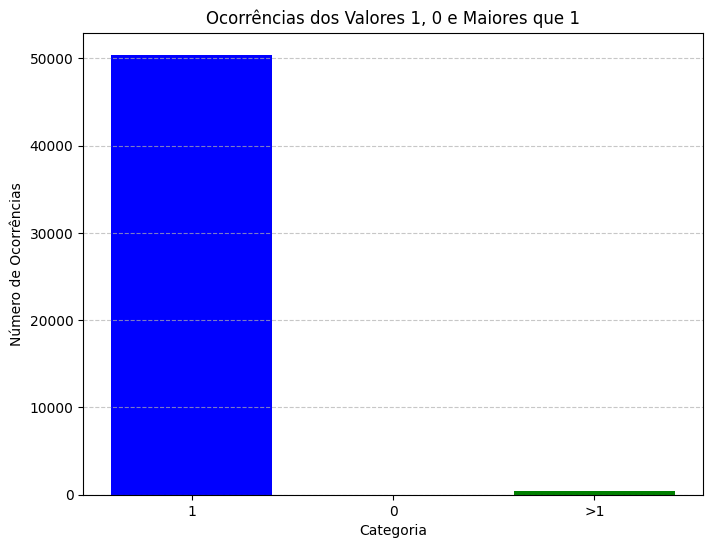

In [58]:
ocorrencias = contar_ocorrencias(resultado)

df_ocorrencias = pd.DataFrame(list(ocorrencias.items()), columns=['Categoria', 'Contagem'])

plt.figure(figsize=(8, 6))
plt.bar(df_ocorrencias['Categoria'], df_ocorrencias['Contagem'], color=['blue', 'red', 'green'])
plt.xlabel('Categoria')
plt.ylabel('Número de Ocorrências')
plt.title('Ocorrências dos Valores 1, 0 e Maiores que 1')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# RNN

## Label Encoder

In [59]:
label_encoder = LabelEncoder()
df_numeric['intencao_encoded'] = label_encoder.fit_transform(df_numeric['intencao'])

## Formatação de Dados Para a Rede Neural

In [60]:
grouped = df_numeric.groupby('id_sentenca').agg({
    'word_0': lambda x: list(x),
    'word_1': lambda x: list(x),
    'pos_tagging_ADJ': lambda x: list(x),
    'pos_tagging_ADP': lambda x: list(x),
    'pos_tagging_ADV': lambda x: list(x),
    'pos_tagging_AUX': lambda x: list(x),
    'pos_tagging_CCONJ': lambda x: list(x),
    'pos_tagging_DET': lambda x: list(x),
    'pos_tagging_NOUN': lambda x: list(x),
    'pos_tagging_NUM': lambda x: list(x),
    'pos_tagging_None': lambda x: list(x),
    'pos_tagging_PRON': lambda x: list(x),
    'pos_tagging_PROPN': lambda x: list(x),
    'pos_tagging_PUNCT': lambda x: list(x),
    'pos_tagging_VERB': lambda x: list(x),
    'ent_nomeada': lambda x: list(x),
    'ocorrencias': lambda x: list(x),
    'intencao_encoded': 'first'
}).reset_index()

In [61]:
vocab = list(set(word for sentence in grouped['word_0'] for word in sentence))
word_to_index = {word: i for i, word in enumerate(vocab)}

grouped['palavra_indices'] = grouped['word_0'].apply(lambda words: [word_to_index[word] for word in words])

max_length = max(len(seq) for seq in grouped['palavra_indices'])
X_words = pad_sequences(grouped['palavra_indices'], maxlen=max_length, padding='post')

In [62]:
def prepare_additional_features(grouped_df, max_length):
    features = [
        'word_1', 'pos_tagging_ADJ',
        'pos_tagging_ADP',
        'pos_tagging_ADV',
        'pos_tagging_AUX',
        'pos_tagging_CCONJ',
        'pos_tagging_DET',
        'pos_tagging_NOUN',
        'pos_tagging_NUM',
        'pos_tagging_None',
        'pos_tagging_PRON',
        'pos_tagging_PROPN',
        'pos_tagging_PUNCT',
        'pos_tagging_VERB',
        'ent_nomeada', 'ocorrencias'
    ]

    feature_arrays = []

    for feature in features:
        feature_array = pad_sequences(grouped_df[feature].tolist(), maxlen=max_length, padding='post')
        feature_arrays.append(feature_array)

    return np.stack(feature_arrays, axis=-1)

In [63]:
X_features = prepare_additional_features(grouped, max_length)
y = np.array(grouped['intencao_encoded'])

In [64]:
class AggregateFeatures(Layer):
    def __init__(self, **kwargs):
        super(AggregateFeatures, self).__init__(**kwargs)

    def call(self, inputs):
        words, features = inputs
        aggregated_features = tf.reduce_mean(features, axis=1)
        return tf.concat([words, aggregated_features], axis=-1)

## Definição do Modelo

In [65]:
vocab_size = len(vocab)
embedding_dim = 100
num_classes = len(label_encoder.classes_)
max_length = 100

X_words_padded = pad_sequences(X_words, maxlen=max_length, padding='post')
X_features_padded = pad_sequences(X_features, maxlen=max_length, padding='post')

X_train_words, X_val_words, X_train_features, X_val_features, y_train, y_val = train_test_split(
    X_words_padded, X_features_padded, y, test_size=0.2, random_state=42)

inputs_words = Input(shape=(max_length,))
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs_words)

rnn_layer = Bidirectional(LSTM(units=64, return_sequences=False))(embedding_layer)
rnn_layer = Dropout(0.5)(rnn_layer)

inputs_features = Input(shape=(max_length, X_features.shape[-1]))

concat_layer = AggregateFeatures()([rnn_layer, inputs_features])

dense_layer = Dense(32, activation='relu')(concat_layer)

output_layer = Dense(num_classes, activation='softmax')(dense_layer)

model = Model(inputs=[inputs_words, inputs_features], outputs=output_layer)

## Compilação do Modelo

In [66]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Early Stop

In [67]:
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

## Treinando Modelo

In [68]:
history = model.fit(
    [X_train_words, X_train_features], y_train,
    validation_data=([X_val_words, X_val_features], y_val),
    epochs=1000, batch_size=96, callbacks=[early_stopping], verbose=1
)

Epoch 1/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.0523 - loss: 2.9447 - val_accuracy: 0.0555 - val_loss: 2.9430
Epoch 2/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.0440 - loss: 2.9366 - val_accuracy: 0.0442 - val_loss: 2.9342
Epoch 3/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0437 - loss: 2.9289 - val_accuracy: 0.0532 - val_loss: 2.9242
Epoch 4/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0577 - loss: 2.9182 - val_accuracy: 0.0759 - val_loss: 2.9122
Epoch 5/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0716 - loss: 2.8986 - val_accuracy: 0.1076 - val_loss: 2.8899
Epoch 6/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0778 - loss: 2.8794 - val_accuracy: 0.0940 - val_loss: 2.8548
Epoch 7/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0840 - loss: 2.8432 - val_accuracy: 0.1053 - val_loss: 2.8158
Epoch 8/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0978 - loss: 2.7916 - val_accu

## Desempenho do modelo

Como podemos ver no gráfico abaixo, a perda de treinamento continua a diminuir enquanto a perda de validação começa a aumentar, isso é um indicativo de overfitting. O modelo está aprendendo os detalhes e ruídos dos dados de treinamento, mas não consegue generalizar para dados não vistos.

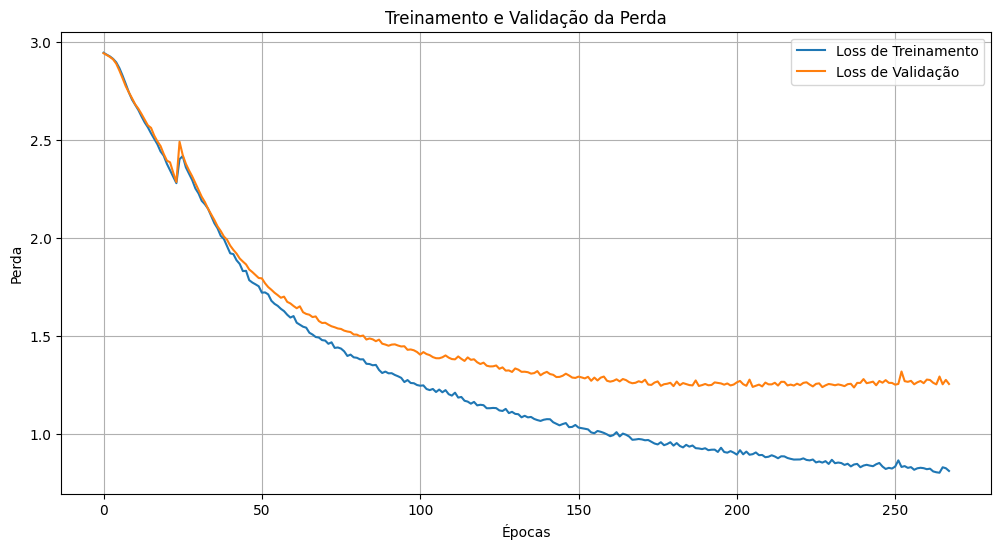

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss de Treinamento')
plt.plot(history.history['val_loss'], label='Loss de Validação')
plt.title('Treinamento e Validação da Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)
plt.show()

## Predição

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


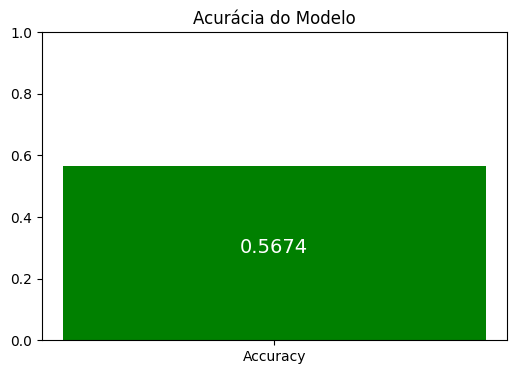

In [70]:
X_words_test_padded = pad_sequences(X_val_words, maxlen=max_length, padding='post')
X_features_test_padded = pad_sequences(X_val_features, maxlen=max_length, padding='post')

predictions = model.predict([X_words_test_padded, X_features_test_padded])
predicted_classes = np.argmax(predictions, axis=1)

accuracy = accuracy_score(y_val, predicted_classes)

plt.figure(figsize=(6, 4))
plt.title('Acurácia do Modelo')
plt.bar(['Accuracy'], [accuracy], color='green')
plt.ylim(0, 1)
plt.text(0, accuracy / 2, f'{accuracy:.4f}', ha='center', color='white', fontsize=14)
plt.show()

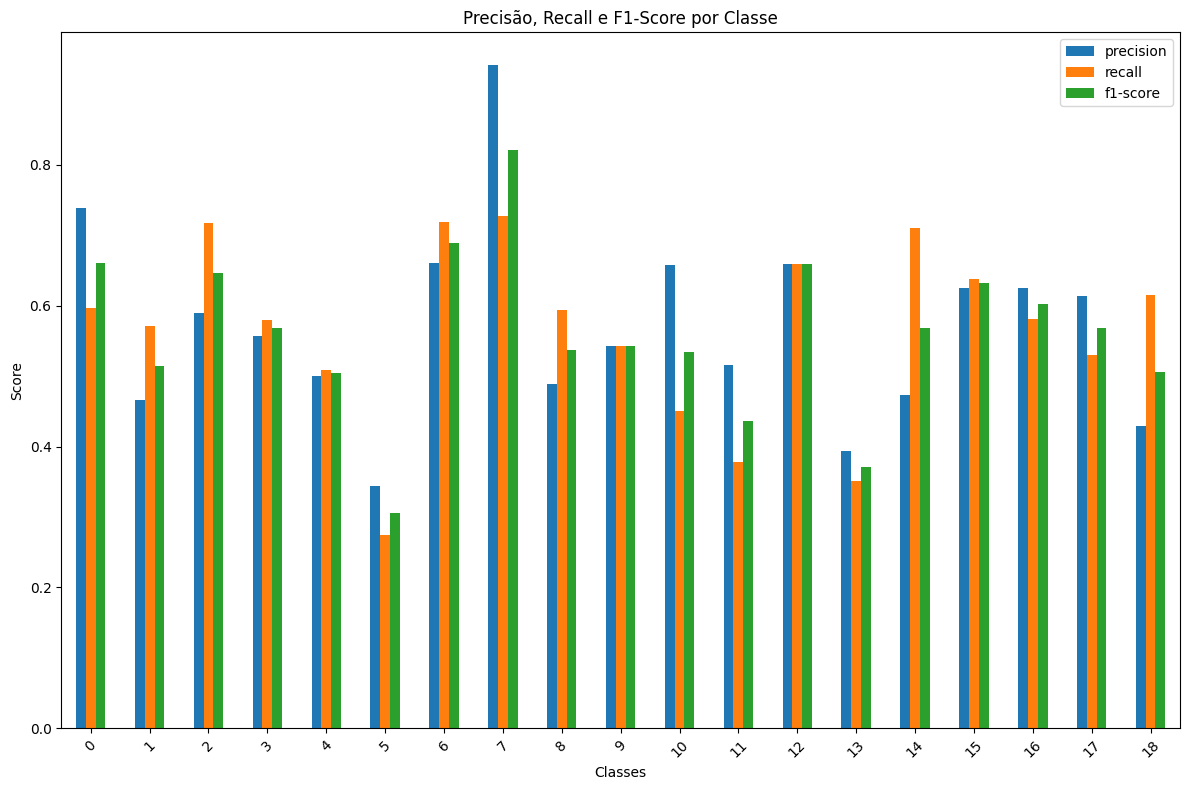

In [71]:
target_names = [str(label) for label in label_encoder.classes_]

classification_rep = classification_report(y_val, predicted_classes, target_names=target_names, output_dict=True)

metrics_df = pd.DataFrame(classification_rep).T[:-3]
metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 8))
plt.title('Precisão, Recall e F1-Score por Classe')
plt.ylabel('Score')
plt.xlabel('Classes')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

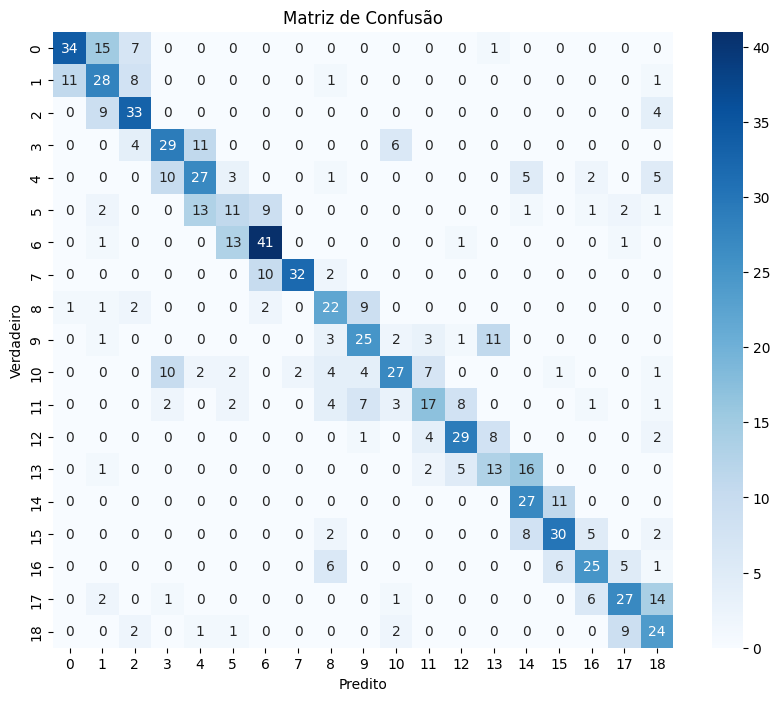

In [72]:
conf_matrix = confusion_matrix(y_val, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

### Análise da Matriz de Confusão

A matriz de confusão mostra a performance de um modelo de classificação com 19 classes (de 0 a 18). Aqui estão os principais pontos observados:

- **Precisão nas Classes**:
  - O modelo apresenta uma boa precisão em várias classes, como 0, 2, 6 e 12, onde as previsões corretas dominam a diagonal principal.

- **Confusões Comuns**:
  - Há confusões significativas entre algumas classes, especialmente:
    - Classe 0 e 1: 17 exemplos de classe 0 foram classificados como 1, e 14 exemplos de classe 1 como 0.
    - Classe 3 e 4: 10 exemplos de classe 3 foram classificados como 4.
    - Classe 14 e 15: Muitas confusões entre essas classes consecutivas.

- **Classes com Baixa Performance**:
  - Algumas classes, como 14, 16 e 18, mostram desempenho inferior, com mais confusões em relação às previsões corretas.

- **Tendências que o grupo observou**:
  - Observa-se uma tendência de confusão entre classes consecutivas, como 0 e 1, 4 e 5, 14 e 15, indicando que o modelo pode ter dificuldades para distinguir essas classes. Talvez pela ausência de dados dessa categoria no momento de treino.



# Análise de execução do modelo com GPU x CPU

Abaixo está um marcador de execução de CPU ou GPU, ao executar o modelo, é incializada uma variável de tempo até o final da execução, abaixo irá mostrar o tipo de execução se foi CPU ou GPU e o tempo total de treinamento.

Foram realizados duas execuções do modelo, segue abaixo o resultado obtido em cada um:

- CPU: 2.58 segundos
- GPU: 6.11 segundos

## Comparação de Resultados

- CPU: Teve um desempenho mais rápido, completando a tarefa em menos tempo.
- GPU: Foi mais lenta, possivelmente devido à sobrecarga de transferência de dados, inicialização ou subutilização em um modelo menor.

Apesar de a GPU normalmente ser mais rápida, neste caso, a CPU foi mais eficiente. A escolha entre CPU e GPU deve considerar o tipo de tarefa e a configuração do hardware utilizado.

In [73]:
device_name = tf.test.gpu_device_name()
if device_name:
    print("Treinado na GPU:", device_name)
else:
    print("Treinado na CPU")

Treinado na GPU: /device:GPU:0


In [74]:
elapsed_time = time.time() - start_time
print(f"Tempo total de treinamento: {elapsed_time:.2f} segundos")

Tempo total de treinamento: 257.58 segundos


### Análise do Tempo de Treinamento do Modelo

Abaixo podemos observar o tempo de treinamento do modelo RNN que foi desenvolvido utilizando CPU e GPU.

Foram feitos 3 testes de tempo do modelo, isso porque o tempo de treinamento pode variar entre execuções por vários motivos, como o uso de recursos do sistema, sobrecarga de I/O (entrada e saída de dados), variações nas alocações de memória entre outros fatores externos.

Ao realizar alguns testes conseguimos ter uma maior confiança dos resultados.

Os resultados obtidos foram:

 **1° Teste:**
Tempo de treinamento com CPU: 60.52 segundos
Tempo de treinamento com GPU: 38.38 segundos

 **2° Teste:**
Tempo de treinamento com CPU: 43.98 segundos
Tempo de treinamento com GPU: 19.06 segundos

 **3° Teste:**
Tempo de treinamento com CPU: 44.64 segundos
Tempo de treinamento com GPU: 20.27 segundos


A GPU acabou apresentando os melhores resultadose isso tem como principal razão o fato dela ser projetada para realizar um grande número de operações matemáticas em paralelo, o que é primordial para o processamento de redes neurais que envolvem muitas operações matriciais e de vetores.





### Teste 1

In [75]:
def train_and_measure_time(device):
    print(f"\nTraining with {device}...\n")
    with tf.device(device):
        start_time = time.time()
        history = model.fit(
            [X_train_words, X_train_features], y_train,
            validation_data=([X_val_words, X_val_features], y_val),
            epochs=1000, batch_size=96, callbacks=[early_stopping], verbose=1
        )
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Training time with {device}: {elapsed_time:.2f} seconds")
        return elapsed_time

cpu_time = train_and_measure_time('/CPU:0')
gpu_time = train_and_measure_time('/GPU:0')

print(f"Tempo de treinamento com CPU: {cpu_time:.2f} segundos")
print(f"Tempo de treinamento com GPU: {gpu_time:.2f} segundos")


Training with /CPU:0...

Epoch 1/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.6784 - loss: 0.8364 - val_accuracy: 0.5742 - val_loss: 1.2397
Epoch 2/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.6795 - loss: 0.8416 - val_accuracy: 0.5595 - val_loss: 1.2470
Epoch 3/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.6877 - loss: 0.8135 - val_accuracy: 0.5685 - val_loss: 1.2601
Epoch 4/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.6681 - loss: 0.8357 - val_accuracy: 0.5674 - val_loss: 1.2448
Epoch 5/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.6981 - loss: 0.8079 - val_accuracy: 0.5606 - val_loss: 1.2655
Epoch 6/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.6790 - loss: 0.8200 - val_accuracy: 0.5640 - val_loss: 1.2682
Epoch 7/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6857 - loss: 0.8352 - val_accuracy: 0.5730 - val_loss: 1.2720
Epoch 8/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6751

### Teste 2

In [76]:
cpu_time = train_and_measure_time('/CPU:0')
gpu_time = train_and_measure_time('/GPU:0')

print(f"Tempo de treinamento com CPU: {cpu_time:.2f} segundos")
print(f"Tempo de treinamento com GPU: {gpu_time:.2f} segundos")


Training with /CPU:0...

Epoch 1/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6894 - loss: 0.8061 - val_accuracy: 0.5730 - val_loss: 1.2361
Epoch 2/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6753 - loss: 0.8124 - val_accuracy: 0.5821 - val_loss: 1.2405
Epoch 3/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6784 - loss: 0.8259 - val_accuracy: 0.5629 - val_loss: 1.2301
Epoch 4/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6851 - loss: 0.8210 - val_accuracy: 0.5742 - val_loss: 1.2453
Epoch 5/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6960 - loss: 0.8050 - val_accuracy: 0.5708 - val_loss: 1.2602
Epoch 6/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6870 - loss: 0.8051 - val_accuracy: 0.5696 - val_loss: 1.2387
Epoch 7/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6808 - loss: 0.8230 - val_accuracy: 0.5730 - val_loss: 1.2380
Epoch 8/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6902

### Teste 3

In [77]:
cpu_time = train_and_measure_time('/CPU:0')
gpu_time = train_and_measure_time('/GPU:0')

print(f"Tempo de treinamento com CPU: {cpu_time:.2f} segundos")
print(f"Tempo de treinamento com GPU: {gpu_time:.2f} segundos")


Training with /CPU:0...

Epoch 1/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.6833 - loss: 0.7943 - val_accuracy: 0.5663 - val_loss: 1.2436
Epoch 2/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6904 - loss: 0.7955 - val_accuracy: 0.5730 - val_loss: 1.2367
Epoch 3/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6785 - loss: 0.8225 - val_accuracy: 0.5674 - val_loss: 1.2492
Epoch 4/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6843 - loss: 0.8208 - val_accuracy: 0.5617 - val_loss: 1.2664
Epoch 5/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6954 - loss: 0.8246 - val_accuracy: 0.5753 - val_loss: 1.2424
Epoch 6/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6824 - loss: 0.8098 - val_accuracy: 0.5719 - val_loss: 1.2650
Epoch 7/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6979 - loss: 0.8112 - val_accuracy: 0.5663 - val_loss: 1.2652
Epoch 8/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7099

## Conexão com o servidor Shrek

In [2]:
import requests

url = "http://localhost:434/api/generate"

headers = {
    "Content-Type": "application/json"
}

data = {
    "model": "llama3",
    "prompt": "[INST] Primeiro contato [/INST]",
    "raw": True,
    "stream": False
}

response = requests.post(url, headers=headers, json=data)

if response.status_code == 200:
    print("Resposta da API:")
    print(response.json())
else:
    print(f"Erro: {response.status_code}")
    print(response.text)


Resposta da API:
{'model': 'llama3', 'created_at': '2024-09-20T11:27:02.748378774Z', 'response': ' [INST] 1º passo: "Hello, how are you?" [/INST]\nA great introduction to the world of communication!\nThis activity is designed for beginners and will help them feel more confident when making first contacts. It\'s a fun way to learn about cultural differences and how they affect our interactions with others.\n[INST] First steps in language exchange [/INST]\nHere, we\'ll explore some essential phrases and expressions that can help you get started:\n- "Hello, how are you?" (English)\n- "Bonjour, comment allez-vous?" (French)\n- "Hola, ¿cómo estás?" (Spanish)\n- "" (Konnichiwa, genki desu ka?) (Japanese)\n\nRemember: the key to a successful first contact is to be friendly and genuine. Smile, make eye contact, and show interest in the other person! [/INST]\n[INST] Second step: Asking for help [/INST]\nNow that you\'ve introduced yourself, it\'s time to ask for help! This is where things can g